In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import seaborn as sn
%matplotlib inline

In [2]:
data=pd.read_csv('mnist.csv')



<h1>Loading data</h1>
<h2>You can select</h2>
<lu>
    <li>Amount of intances with intances_n</li>
       <li>Amount of classes with Classes_</li>
    
</lu>


In [3]:
intances_n=4000
X = data.iloc[0:intances_n,1:].values
Y = data.iloc[0:intances_n,0].values
print(X.shape)

##for selecting different classes
classes_array=[3,4,5]
classes=np.where((Y==classes_array[0])|(Y==classes_array[1])|(Y==classes_array[2]))
x_class=X[classes]
y_class=Y[classes]

##just put x_class and y_class variables in train_test_split instead of X and Y
##changing classes also effect the PCA results



(4000, 784)


In [4]:
##Change test_size for different results
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=3)


<h2>Fitting model</h2>

In [5]:
##change activation function,solver,hidden_layer_sizes,max_iter and learning rate for different results
## N represent the number of neurons in each later   hidden_layer_size(N,N,N.....) ie
##ie hidden_layer_size(20,20) represents two layers with 20 neurons


activation="tanh"##activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
solver="sgd"##  solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
max_iter=200 ##max_iterint, default=200 note:increasing max iter can take longer time to proccess
learning_rate_init=0.001
nn=MLPClassifier(activation=activation,solver=solver,hidden_layer_sizes=(30),random_state=1,
max_iter=max_iter,learning_rate_init=learning_rate_init)
nn.fit(x_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=30, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

<h1>Predicting and accuracy results</h1>

Predicted value:  7
Real value:  7


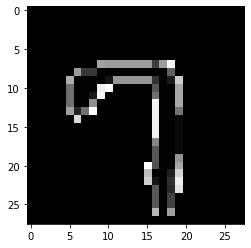

Predicted value:  4
Real value:  4


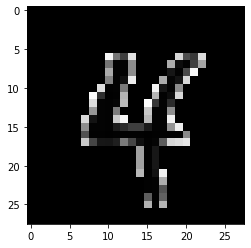

Predicted value:  2
Real value:  2


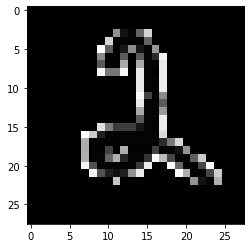

Predicted value:  5
Real value:  5


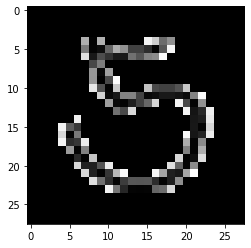

Predicted value:  3
Real value:  3


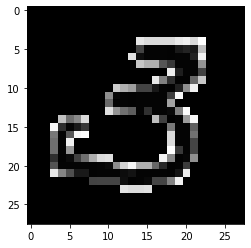

[[74  0  1  0  0  1  2  0  0  0]
 [ 0 96  0  1  0  0  0  0  0  0]
 [ 0  0 60  0  2  0  0  2  2  0]
 [ 2  0  4 73  1  6  1  1  1  1]
 [ 0  0  2  0 59  0  2  0  0  3]
 [ 2  0  1  4  0 51  2  1  4  0]
 [ 0  0  1  0  0  0 86  0  0  0]
 [ 0  2  2  2  3  1  0 77  2  2]
 [ 0  2  1  4  1  2  0  4 61  2]
 [ 1  0  0  2  3  0  0  3  1 73]]


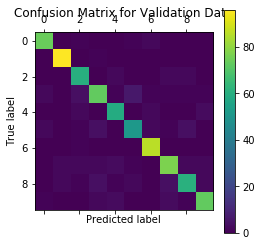

In [6]:
pred=nn.predict(x_test)
accuracy=accuracy_score(y_test,pred)
numberof_images_display=5
n= np.random.randint(0,len(x_test),numberof_images_display)
for i in n:
    two_d = (np.reshape(x_test[i], (28, 28)) * 255).astype(np.uint8)
    print("Predicted value: ",pred[i])
    print("Real value: ",y_test[i])
                                                
    plt.imshow(two_d, interpolation='nearest',cmap='gray')
    plt.show()


confusionmatrix=confusion_matrix(y_test,pred)

plt.matshow(confusionmatrix)
print(confusionmatrix)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [7]:
print("Accuracy: ",accuracy)

Accuracy:  0.8875


<h1>Running PCA in Dataset</h1>

In [8]:
##change number of dimentions also for getting different results
N_dimentions=30
pca = PCA(n_components=N_dimentions, svd_solver='randomized',
          whiten=True).fit(x_train)


x_train_pca = pca.transform(x_train)
x_test_pca=pca.transform(x_test)

<h2>Fitting model with PCA results</h2>

In [9]:
##change activation function,solver,hidden_layer_sizes,max_iter and learning rate for different results
## N represent the number of neurons in each later   hidden_layer_size(N,N,N.....) ie
##ie hidden_layer_size(20,20) represents two layers with 20 neurons


activation="tanh"##activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
solver="sgd"##  solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
max_iter=200 ##max_iterint, default=200 note:increasing max iter can take longer time to proccess
learning_rate_init=0.001
nn=MLPClassifier(activation=activation,solver=solver,hidden_layer_sizes=(30),random_state=1,
max_iter=max_iter,learning_rate_init=learning_rate_init)
nn.fit(x_train_pca,y_train)

D:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=30, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

<h1>Predicting and accuracy results with PCA included</h1>

Predicted value:  5
Real value:  5


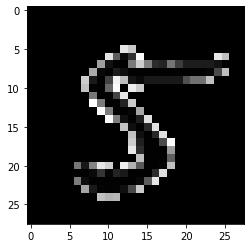

Predicted value:  4
Real value:  4


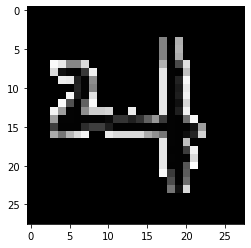

Predicted value:  2
Real value:  2


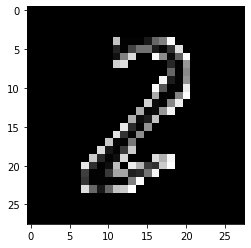

Predicted value:  1
Real value:  1


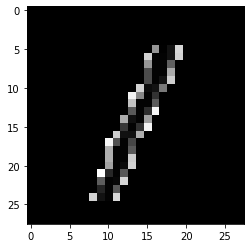

Predicted value:  6
Real value:  6


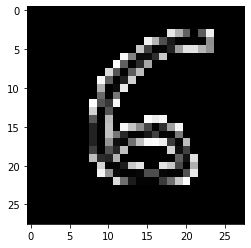

[[69  0  1  0  0  3  5  0  0  0]
 [ 0 94  1  0  0  0  0  1  1  0]
 [ 0  1 60  0  1  0  1  1  1  1]
 [ 1  3  1 76  0  3  1  0  0  5]
 [ 0  0  2  0 60  1  0  0  0  3]
 [ 4  0  1  4  1 48  2  0  5  0]
 [ 0  0  1  0  1  0 85  0  0  0]
 [ 1  3  1  1  5  0  0 79  0  1]
 [ 1  3  1  8  0  0  3  0 58  3]
 [ 0  0  0  1  6  0  0  2  3 71]]


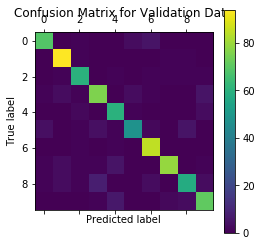

In [10]:
pred=nn.predict(x_test_pca)
accuracy=accuracy_score(y_test,pred)
numberof_images_display=5
n= np.random.randint(0,len(x_test_pca),numberof_images_display)
for i in n:
    two_d = (np.reshape(x_test[i], (28, 28)) * 255).astype(np.uint8)
    print("Predicted value: ",pred[i])
    print("Real value: ",y_test[i])
    plt.imshow(two_d, interpolation='nearest',cmap='gray')
    plt.show()  
    ##plt.imshow(two_d, interpolation='nearest',cmap='gray')
   ## plt.show()

confusionmatrix=confusion_matrix(y_test,pred)
plt.matshow(confusionmatrix)
print(confusionmatrix)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [11]:
print("accuracy",accuracy)

accuracy 0.875
